# Midsemester Project
Rosa Kurtz

### Part 1: L1, L2, L3 numerically with 3 different methods 

Secant Method - L1

exact: 0.010002782349093813 AU
 
Secant Method
0.009969326423799862 AU
 
scipy.optimize.newton (secant)
0.00996932642379988 AU


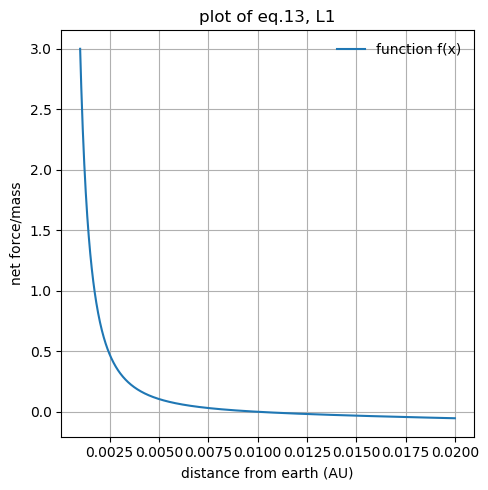

In [33]:

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.optimize as optimize

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon'] = False

Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

l=(1.496*10**11) #m
G=(6.6743*10**-11) #Si

#rs = l*(Me/(Ms+Me)) # in -i dir (m)
#re = l*(Ms/(Ms+Me)) # in +i dir (m)

rs = (Me/(Ms+Me)) # in -i dir (Au)
re = (Ms/(Ms+Me)) # in +i dir (Au)


P= (l**(3/2))*sqrt((4*(pi**2))/(G*(Ms+Me)))

print("exact:", ((Me/(3*(Me+Ms)))**(1/3)), "AU")
print(" ")

#print(re,"AU ",rs,"AU ", "from CoM")

def f(u): 
    return (re-u)   -   (re/((1-u)**2))   +   (rs/(u**2))

def f_prime(x_pres,x_past):
    return (f(x_pres)-f(x_past))/(x_pres-x_past)

def centraldiff(f,xp,h):
    return (f(xp+h)-f(xp-h))/(2*h)




x_min=10**-3
x_max=0.02

Ns=1000
h  = (x_min - x_max)/(Ns*100)

x_closemin=.008

def secant(f,xi,tol):
    iter=0
    if(iter==0):
        f_prime1=centraldiff(f,xi,h)
        xi_p=xi-(f(xi)/f_prime1)  
    while((xi_p-xi)>tol): #or iter==0):
        iter=iter+1
        xi_m=xi
        xi=xi_p 
        xi_p=xi-(f(xi)/f_prime(xi,xi_m))
    return xi_p

xs=np.linspace(x_min,x_max,Ns)
y=f(xs)


print('Secant Method')
print(secant(f, x_closemin, 1E-9), "AU")
print(' ')
print('scipy.optimize.newton (secant)')
print(optimize.newton(f, x_closemin, tol=1E-9, full_output=False), "AU")



fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.plot(xs,  y,  'C0-', label='function f(x)')
plt.ylabel('net force/mass')
plt.xlabel('distance from earth (AU)')
plt.title('plot of eq.13, L1')
plt.grid('minor','both')
plt.legend(loc=0)


#ax2 = fig.add_subplot(212)



fig.tight_layout()
plt.show()



Method of False Position - L2 

exact: 0.010002782349093813 AU


Method of False Position
0.01003602922711641 AU


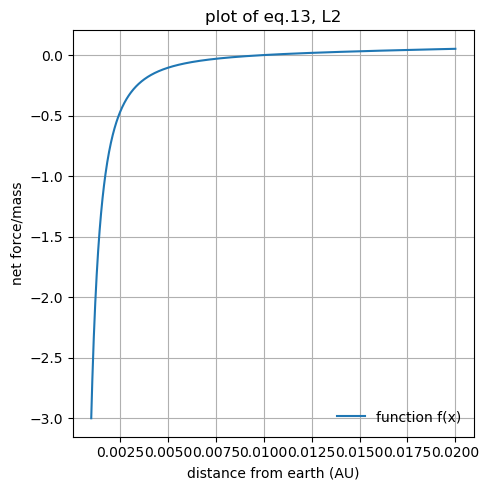

In [34]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.optimize as optimize

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon'] = False

Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

l=(1.496*10**11) #m
G=(6.6743*10**-11) #Si

rs = (Me/(Ms+Me)) # in -i dir (Au)
re = (Ms/(Ms+Me)) # in +i dir (Au)


print("exact:", ((Me/(3*(Me+Ms)))**(1/3)), "AU") ###L2 found to be same distance as L1 from earth (opposite dir.s)
print('\n')


def f(u): 
    return (re+u)   -   (re/((1+u)**2))   -   (rs/(u**2))

###
# Define method of false position
def falseposition(f, x1, x2):
    # Set limits
    accuracy = 1E-9
    Nmax     = 1000
    
    # Init and check
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2 > 0:
        return
    
    # Iterate
    i     = 0
    delta = 1
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Guess
        xg    = (x1*f2 - x2*f1)/(f2 - f1)
        fg    = f(xg)
        delta = (xg - x1)/xg
        
        # Check
        if f1*fg > 0:
            x1 = xg
            f1 = fg
        else:
            x2 = xg
            f2 = fg
    
    return xg, i, delta

xmin=.008
xmax=.0125

# Print results
print('Method of False Position')
a,b,c=falseposition(f, xmin, xmax)
print(a, 'AU')

x_min=10**-3
x_max=0.02

Ns=1000
xs=np.linspace(x_min,x_max,Ns)
y=f(xs)





fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.plot(xs,  y,  'C0-', label='function f(x)')

plt.ylabel('net force/mass')
plt.xlabel('distance from earth (AU)')
plt.title('plot of eq.13, L2')
plt.grid('minor','both')
plt.legend(loc=0)

fig.tight_layout()
plt.show()





Bisection Method - L3

Binary Search
4.253548481967301e-06 AU
 
scipy.optimize.bisect
4.25360107421875e-06 AU


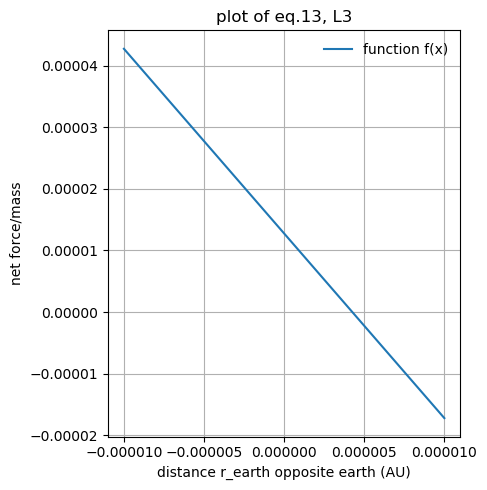

In [35]:
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.optimize as optimize

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon'] = False

Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

l=(1.496*10**11) #m
G=(6.6743*10**-11) #Si

rs = (Me/(Ms+Me)) # in -i dir (Au)
re = (Ms/(Ms+Me)) # in +i dir (Au)



def f(u): 
    return (re/((u+re-rs)**2))   +   (rs/(((2*re)+u)**2))   -   (re+u)

# Define bisectional method
def bisection(f, x1, x2):
    # Set limits
    accuracy = 1E-9
    Nmax     = 1000
    
    # Init and check
    f1 = f(x1)
    f2 = f(x2)
    if f1*f2 > 0:
        return
    
    # Iterate
    i     = 0
    delta = 1
    
    while abs(delta) > accuracy and i < Nmax:
        # Increment
        i += 1
        
        # Midpoint
        xc    = (x1 + x2)/2
        fc    = f(xc)
        delta = (xc - x1)/xc
        
        # Check
        if f1*fc > 0:
            x1 = xc
            f1 = fc
        else:
            x2 = xc
            f2 = fc
    
    return xc, i, delta

xmin=10**-6
xmax=.00001
# Print results
print('Binary Search')
a,b,c=bisection(f, xmin, xmax)
print(a, "AU")
print(' ')
print('scipy.optimize.bisect')
print(optimize.bisect(f, xmin, xmax, xtol=1E-9, full_output=False), "AU")
x_min=-.00001
x_max=.00001

Ns=1000
xs=np.linspace(x_min,x_max,Ns)
y=f(xs)



fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.plot(xs,  y,  'C0-', label='function f(x)')
#k = ax1.plot(xs,  root,  'k-', label='0')
plt.ylabel('net force/mass')
plt.xlabel('distance r_earth opposite earth (AU)')
plt.title('plot of eq.13, L3')
plt.grid('minor','both')
plt.legend(loc=0)

fig.tight_layout()
plt.show()



The value printed for L3 is a distance designated 'u' in written work that measures a small distance from distance re measured to the CoM opposite from re to the earth

( L3 is at distance u + 2re from the earth, and u has been calculated)

### Part 2: L4, L5



In [1]:

import matplotlib        as mpl
import matplotlib.pyplot as plt

import numpy as np
from numpy import array,empty
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.linalg as linalg

N = 2

#h=.0001 # change this

Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

rS = (Me/(Ms+Me)) # in -i dir (Au)
rE = (Ms/(Ms+Me)) # in +i dir (Au)

def rs(x,y):
    return sqrt((x**2) + (y**2) + (2*x*rS) + (rS**2))

def re(x,y):
    return sqrt((x**2) + (y**2) - (2*x*rE) + (rE**2))

def wX(x,y):
    return x - (rE/(rs(x,y)**3))*(x+rS)  + (rS/(re(x,y)**3))*(rE-x)
    
def wY(x,y):
    return y - (rE/(rs(x,y)**3))*(y)  - (rS/(re(x,y)**3))*(y)

def parX(f,x,y): #put wx or wy
    return (f(x+h,y)-f(x-h,y))/(2*h)
    
def parY(f,x,y):
    return (f(x,y+h)-f(x,y-h))/(2*h)

def J(x,y):#f1,f2,x,y wX then
    J=array([[ 0,  0],
             [ 0,  0]],float)
    J[0][0]=parX(wX,x,y)
    J[0][1]=parY(wX,x,y)
    J[1][0]=parX(wY,x,y)
    J[1][1]=parY(wY,x,y)

    return J

def piv(c,A,b):
    a=[row[c] for row in A]
    r=[column[c] for column in A]
    a=np.absolute(a)
    pivot = np.where(a==np.amax(a))
    pivot=pivot[0][0]
    return pivot

def partial(c,A,b):
    pivot=piv(c,A,b)
    #swap the max value with the top 
    if(pivot>c):
        sw_down=np.zeros([A.shape[1]])
        sw_up=np.zeros([A.shape[1]])
        for u in range(c,A.shape[1]):
            sw_down[u]=A[c][u]
            sw_up[u]=A[pivot][u]
    
        for u in range(c,A.shape[1]):
            A[c][u]=sw_up[u]
            A[pivot][u]=sw_down[u]
        
        b_down=b[c]
        b_up=b[pivot]
            
        b[c]=b_up
        b[pivot]=b_down
    
##A will be jacobian, v is f(x_guess)    (2x2 and 1x2)
def Gaussian(A,v):
    # Gaussian elimination
    for m in range(N):
        # Partial pivot
        partial(m,A,v)

        # Divide by the diagonal element
        div = A[m,m]
        A[m,:] /= div
        v[m] /= div

    # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = A[i,m]
            A[i,:] -= mult*A[m,:]
            v[i] -= mult*v[m]
        
# Backsubstitution
    x = empty(N,float)
    for m in range(N-1,-1,-1):
        x[m] = v[m]
        for i in range(m+1,N):
            x[m] -= A[m,i]*x[i]
    return x

#### need here solve for vector del r(x,y) using jacobian and gauss
def delrScipy(x,y):
    vec_fgeuss=array([ wX(x,y),  wY(x,y)],float)
    Jacobian=J(x,y)
    del_r=np.linalg.solve(Jacobian, vec_fgeuss)
    x_comp=del_r[0]
    y_comp=del_r[1]
    return x_comp, y_comp

def delrWithmyGauss(x,y):
    vec_fgeuss=array([ wX(x,y),  wY(x,y)],float)
    Jacobian=J(x,y)
    del_r=Gaussian(Jacobian,vec_fgeuss)
    x_comp=del_r[0]
    y_comp=del_r[1]
    return x_comp, y_comp



x_min,y_min=.3,.4
x_max,y_max=1,1

r_min=array([ x_min,  y_min],float)
r_max=array([ x_max,  y_max],float)


Ns=1000
h  = (x_min - x_max)/(Ns*100)


tol=1*(10**-10)


def secant(r_min,tol,g):
    iter=0
    r_ip=array([0,0],float)
    r_i=array([0,0],float)
    delx, dely = g(r_min[0],r_min[1])
    r_ip[0] = r_min[0]  -  delx 
    r_ip[1] = r_min[1]  -  dely 
    
    while(sqrt((r_i[0]-r_ip[0])**2 + (r_i[1]-r_ip[1])**2 )>tol): #or iter==0):
        iter=iter+1
        r_i[0]= r_ip[0]
        r_i[1]= r_ip[1]
        delx, dely = g(r_i[0],r_i[1])
        r_ip[0] = r_i[0]  -  delx #xcomp
        r_ip[1] = r_i[1]  -  dely #ycomp
    l4=array([r_ip[0],r_ip[1]],float)
    l5=array([r_ip[0],-r_ip[1]],float)
    return l4,l5


print("using my gaussian function with partial pivoting for delta x:")
L4,L5=secant(r_min,tol,delrWithmyGauss)
print("vector r(x,y) from CoM to L4:", L4, "AU")
print("vector r(x,y) from CoM to L5:", L5, "AU")
print(' ')
print("using scipy linalg.solve for delta x:")
L4,L5=secant(r_min,tol,delrScipy)
print("vector r(x,y) from CoM to L4:", L4, "AU")
print("vector r(x,y) from CoM to L5:", L5, "AU")

using my gaussian function with partial pivoting for delta x:
vector r(x,y) from CoM to L4: [0.499997  0.8660254] AU
vector r(x,y) from CoM to L5: [ 0.499997  -0.8660254] AU
 
using scipy linalg.solve for delta x:
vector r(x,y) from CoM to L4: [0.499997  0.8660254] AU
vector r(x,y) from CoM to L5: [ 0.499997  -0.8660254] AU


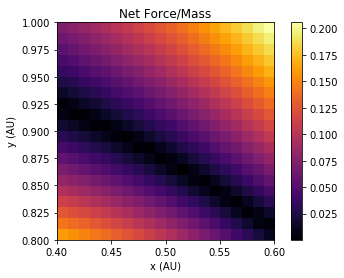

In [32]:

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt, log10

# SciPy
import scipy.optimize as optimize

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt




mpl.rcParams['legend.frameon'] = False



Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

l=(1.496*10**11) #m
G=(6.6743*10**-11) #Si

rS = (Me/(Ms+Me)) # in -i dir (Au)
rE = (Ms/(Ms+Me)) # in +i dir (Au)



def rs(x,y):
    return sqrt((x**2) + (y**2) + (2*x*rS) + (rS**2))

def re(x,y):
    return sqrt((x**2) + (y**2) - (2*x*rE) + (rE**2))

def wX(x,y):
    return x - (rE/(rs(x,y)**3))*(x+rS)  + (rS/(re(x,y)**3))*(rE-x)
    
def wY(x,y):
    return y - (rE/(rs(x,y)**3))*(y)  - (rS/(re(x,y)**3))*(y)



def f(x,y):
    return sqrt(wX(x,y)**2)  +  (wY(x,y)**2)/100






    
it=1*10**-3
X = np.arange(.4, .6, 0.01)
Y = np.arange(.8, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)




plt.title('Net Force/Mass')
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
color_map = plt.imshow(Z, origin='lower', extent=[.4,.6,.8,1])
color_map.set_cmap("inferno")

plt.colorbar()



### Independent; energy/mass(kg) expended to reach L1, L2 or L3 from a point on the co-linear axis

In [34]:

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.optimize as optimize
import scipy.integrate as integrate

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon'] = False

Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

l=(1.496*10**11) #m
G=(6.6743*10**-11) #Si G/m^3


rs = (Me/(Ms+Me)) # in -i dir (Au)
re = (Ms/(Ms+Me)) # in +i dir (Au)


print("exact:", ((Me/(3*(Me+Ms)))**(1/3)), "AU")
print(" ")

print(re,"AU ",rs,"AU ", "from CoM")



fin=0
r1=0
r2=0
inL=input("enter destination; 'L1', 'L2' or 'L3' (string value):")
if(inL=="L1"):
    fin=re-((Me/(3*(Me+Ms)))**(1/3))
    r1=1
    r2=-1
    print(fin)
if(inL=="L2"):
    fin=re+((Me/(3*(Me+Ms)))**(1/3))
    r1=-1
    r2=-1
    print(fin)
if(inL=="L3"):
    fin = -(4.253530389445427*(10**-6))-2*re
    r1=1
    r2=1
    print(fin)

    
ind=input("enter distance from CoM, + for earth direction, - otherwise. Use AU units:")
ref=float(ind)
print(ref)
print(fin)


def f(x): 
    return (Me/(((re-x))**2))*r1  +  (Ms/(((x+rs))**2))*r2 - (Ms+Me)*r2 ##mult G at end

N=1000
x=np.linspace(ref,fin,N)
h=((fin-ref))/N
print(h)
A=0

ref=ref*l
fin=fin*l
for n in range(1,N-1):
    if(n%2==1):
        x_odd=(n)*h
        f_odd = f(x_odd)
        A = A + 4*f_odd 
    if(n%2==0):
        x_even=(n)*h
        f_even = f(x_even)
        A = A + 2*f_even
f_0=f(ref)
f_N=f(fin)
A = (h/3)*(A + f_0 + f_N)
A = -A*G

print('estimate:' , A, "Joules/kg")





exact: 0.010002782349093813 AU
 
0.999996997495189 AU  3.0025048109810297e-06 AU  from CoM
enter destination; 'L1', 'L2' or 'L3' (string value):L1
0.9899942151460952
enter distance from CoM, + for earth direction, - otherwise. Use AU units:2
2.0
0.9899942151460952
-0.0010100057848539048
estimate: -2.532862546092057e+23 Joules/kg


In [10]:
#widgets ***see note
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,IntSlider,FloatSlider
import ipywidgets as widgets

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import exp, log, sqrt, pi, sin, cos

# SciPy
import scipy.optimize as optimize
import scipy.integrate as integrate

# Settings
mpl.style.use('default')
mpl.rcParams['legend.frameon'] = False

Me=5.972*10**24 #mass earth (kg)
Ms=1.989*10**30 #mass earth (kg)

l=(1.496*10**11) #m
G=(6.6743*10**-11) #Si G/m^3


rs = (Me/(Ms+Me)) # in -i dir (Au)
re = (Ms/(Ms+Me)) # in +i dir (Au)

def Endpoint(L):
    if(L==1):
        fin=re-((Me/(3*(Me+Ms)))**(1/3))
        r1=1
        r2=-1
    if(L==2):
        fin=re+((Me/(3*(Me+Ms)))**(1/3))
        r1=-1
        r2=-1
    if(L==3):
        fin = -(4.253530389445427*(10**-6))-2*re
        r1=1
        r2=1
    return fin,r1,r2

def r_u(ref):
    if(ref>0):
        r=1
    else:
        r=-1

def f(x,r1,r2,r): 
    return (Me/(((re-x))**2))*r1  +  (Ms/(((x+rs))**2))*r2 - (Ms+Me)*r2 ##mult G at end

def IntegwithSimpsons(ref,fin,f,r1,r2,r):
    N=1000
    x=np.linspace(ref,fin,N)
    h=((fin-ref))/N
    A=0

    ref=ref*l
    fin=fin*l
    for n in range(1,N-1):
        if(n%2==1):
            x_odd=(n)*h
            f_odd = f(x_odd,r1,r2,r)
            A = A + 4*f_odd 
        if(n%2==0):
            x_even=(n)*h
            f_even = f(x_even,r1,r2,r)
            A = A + 2*f_even
    f_0=f(ref,r1,r2,r)
    f_N=f(fin,r1,r2,r)
    A = (h/3)*(A + f_0 + f_N)
    A = -A*G
    return A




def slow_function(L,Distance):
    fin,r1,r2=Endpoint(L)
    ref=fin+float(Distance)
    r=r_u(ref)
    A=IntegwithSimpsons(ref,fin,f,r1,r2,r)
    print('estimate:' , A, "Joules/kg")
    return

interact_manual(slow_function,L=IntSlider(min=1, max=3, step=1),Distance=FloatSlider(min=-2, max=2, step=1*10**-2));

interactive(children=(IntSlider(value=1, description='L', max=3, min=1), FloatSlider(value=0.0, description='D…

***https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html